In [21]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

**A. Periods and Frequencies** 
Consider the following signals (assume $t$ is in seconds):


A single sine wave:

$f_1(t) = \sin(2\pi \cdot 3 t)$


The sum of two sine waves with different frequencies:

$f_2(t) = \sin(2\pi \cdot 3 t) + \frac{1}{2}\sin(2\pi \cdot 7 t)$


In [22]:
pi = np.pi

def f1(t):
    y = np.sin(2*pi*3*t)
    return y
def f2(t): 
    y = np.sin(2*pi*3*t) + 0.5*np.sin(2*pi*7*t)
    return y 


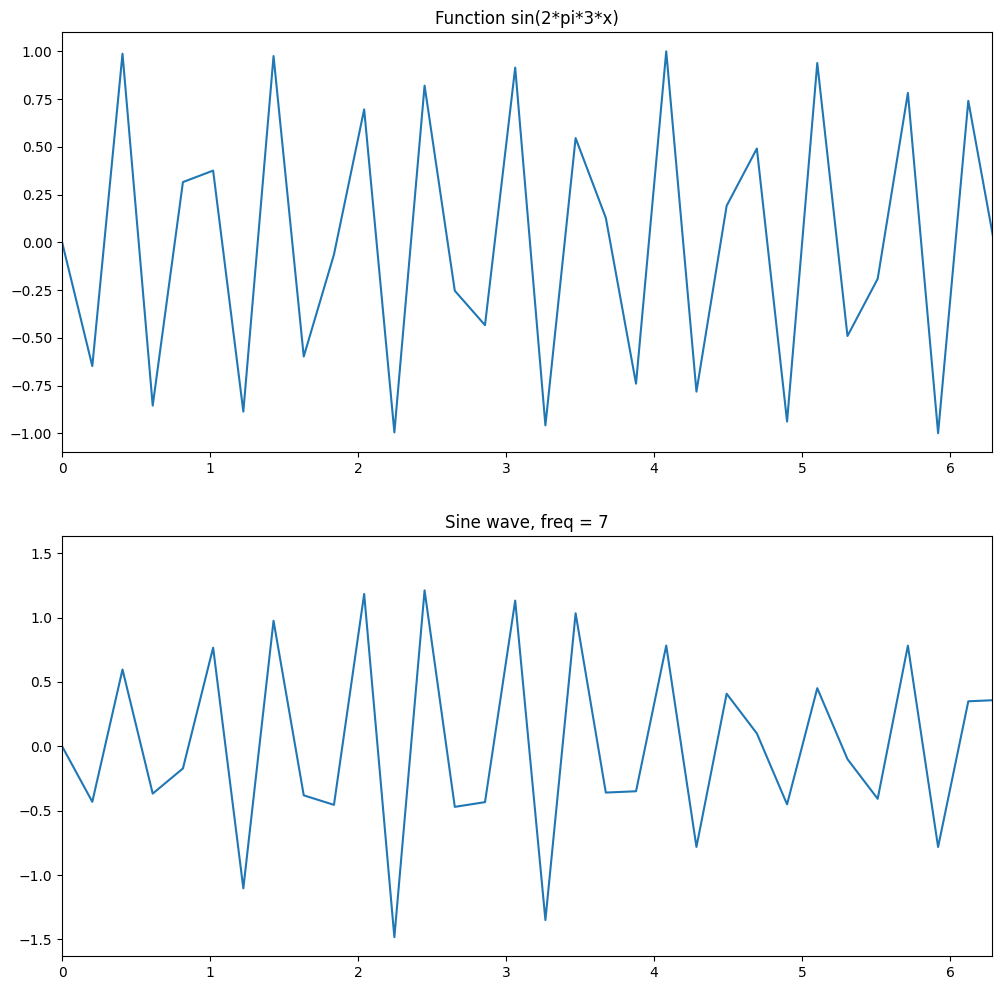

In [ ]:
N = 512
x = np.linspace(0, 10)

plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
plt.title("Function sin(2*pi*3*x)")
plt.plot(x, f1(x))
plt.xlim(0, 2*np.pi)


plt.subplot(2,1,2)
plt.title("Function sin(2*pi*3*x)")
plt.plot(x, f2(x))
plt.xlim(0, 2*np.pi)



plt.show()